# Практическая работа №1(7)

## Константы

In [1]:
BATCH_SIZE = 32 #пакет данных
EPOCHS = 15 #итерации
LEARNING_RATE = 0.01 #шаг

## Код нейросети

### Установка/Импорт библиотек

In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np

In [4]:
tf.random.set_seed(7)

### Работа с датасетом

In [5]:
#Скачивание датасета
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
print(train_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [7]:
#Нормализация датасета
mean = np.mean(train_images)
sttdev = np.std(train_images)
print(mean)
print(sttdev)
train_images = (train_images-mean) / sttdev
test_images = (test_images-mean) / sttdev
print(test_images.shape)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


33.318421449829934
78.56748998339798
(10000, 28, 28)


In [8]:
print(train_images[1])

[[-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389]
 [-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389]
 [-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407

### Работа с нейросетью

In [9]:
initializer = keras.initializers.he_normal()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid',
        kernel_initializer=initializer,
        bias_initializer='zeros'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='sigmoid',
        kernel_initializer=initializer,
        bias_initializer='zeros'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='sigmoid',
        kernel_initializer=initializer,
        bias_initializer='zeros'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, activation='sigmoid',
        kernel_initializer=initializer,
        bias_initializer='zeros'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='sigmoid',
        kernel_initializer=initializer,
        bias_initializer='zeros')

])


C:\Users\madro\miniconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary() #вывод информации о структуре нейросети

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,474 (439.35 KB)

 Trainable params: 111,994 (437.48 KB)

 Non-trainable params: 480 (1.88 KB)

In [11]:
opt = keras.optimizers.SGD(learning_rate=LEARNING_RATE)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#Обучение нейросети
history = model.fit(train_images, train_labels,validation_data = (test_images,test_labels), epochs=EPOCHS,verbose = 2, batch_size=BATCH_SIZE, shuffle=True)

Epoch 1/15
1875/1875 - 9s - 5ms/step - accuracy: 0.8674 - loss: 0.4695 - val_accuracy: 0.9385 - val_loss: 0.2163
Epoch 2/15
1875/1875 - 7s - 3ms/step - accuracy: 0.9332 - loss: 0.2329 - val_accuracy: 0.9547 - val_loss: 0.1547
Epoch 3/15
1875/1875 - 6s - 3ms/step - accuracy: 0.9502 - loss: 0.1722 - val_accuracy: 0.9617 - val_loss: 0.1276
Epoch 4/15
1875/1875 - 6s - 3ms/step - accuracy: 0.9610 - loss: 0.1372 - val_accuracy: 0.9654 - val_loss: 0.1123
Epoch 5/15
1875/1875 - 6s - 3ms/step - accuracy: 0.9680 - loss: 0.1130 - val_accuracy: 0.9685 - val_loss: 0.1033
Epoch 6/15
1875/1875 - 6s - 3ms/step - accuracy: 0.9733 - loss: 0.0945 - val_accuracy: 0.9708 - val_loss: 0.0977
Epoch 7/15
1875/1875 - 6s - 3ms/step - accuracy: 0.9785 - loss: 0.0795 - val_accuracy: 0.9715 - val_loss: 0.0941
Epoch 8/15
1875/1875 - 6s - 3ms/step - accuracy: 0.9824 - loss: 0.0669 - val_accuracy: 0.9721 - val_loss: 0.0919
Epoch 9/15
1875/1875 - 6s - 3ms/step - accuracy: 0.9860 - loss: 0.0562 - val_accuracy: 0.9727 - 

In [13]:
test_images[0]

array([[-0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389],
       [-0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389],
       [-0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.4240

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


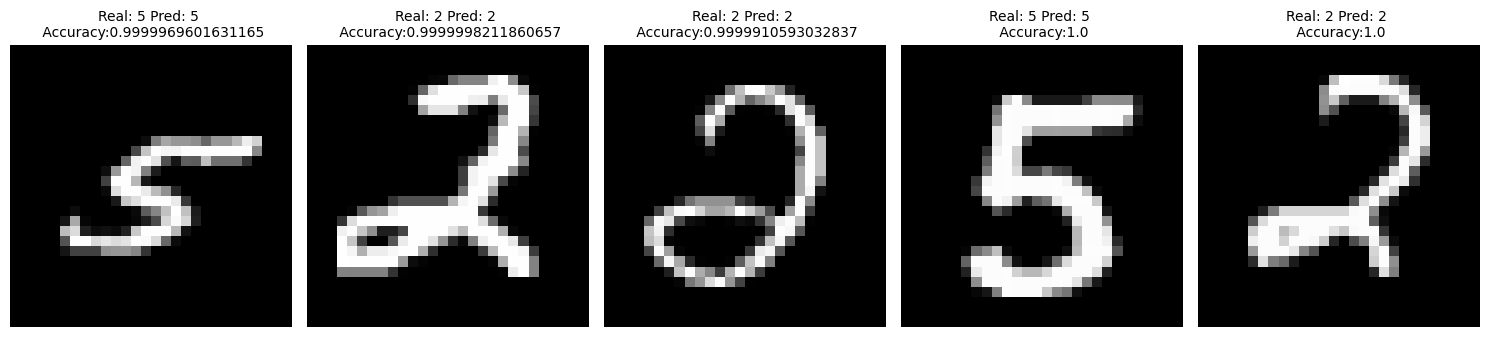

In [22]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 7))
for i in range(5):
    plt.subplot(1, 5, i+1)

    idx = np.random.randint(0, test_images.shape[0])
    img = test_images[idx].reshape(28, 28)

    prediction = model.predict(img.reshape(1, 28, 28))
    real_label = np.argmax(test_labels[idx])
    pred_label = np.argmax(prediction)

    # Отображаем изображение с подписью
    plt.imshow(img, cmap='gray')
    plt.title(f'Real: {real_label} Pred: {pred_label} \n Accuracy:{prediction[0][pred_label]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

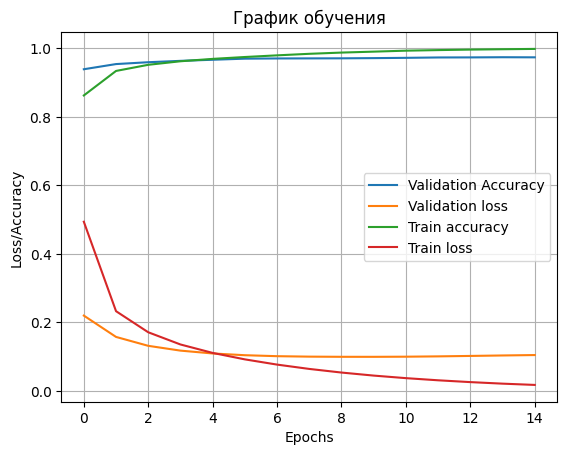

In [15]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(list(range(EPOCHS)), history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(list(range(EPOCHS)), history.history['val_loss'], label='Validation loss')
plt.plot(list(range(EPOCHS)), history.history['accuracy'], label='Train accuracy')
plt.plot(list(range(EPOCHS)), history.history['loss'], label='Train loss')
plt.title('График обучения')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epochs')
plt.grid(True)
plt.legend()
plt.show()